In [1]:
# import section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import *

In [2]:
# temp
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.__version__

'0.8.1'

## TO DO LIST

* controle of de warnings uit kunnen als seaborn 0.9.0 voor Conda beschikbaar is
* seaborn met widgets: select x, select y, select species (multiple),  select 'kind'
* folium! + widgets
* folium wachttijden
* folium selecteer specialisme en toon map
* folium slecteer 3 specialismen en toon 3 boxplots in seaborn!


$f(x) = x^2$

In [4]:
x = np.array(np.arange(-25, 26))
y = x ** 2

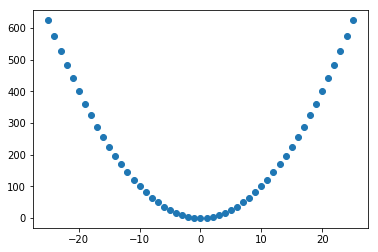

In [5]:
# scatter plot
plt.scatter(x, y)
plt.show()

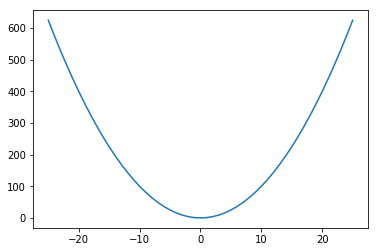

In [6]:
# line plot
plt.plot(x, y)
plt.show()

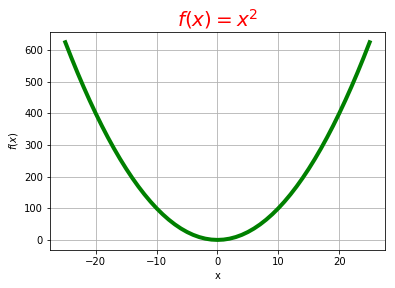

In [11]:
# line plot
plt.plot(x, y, c='g', linewidth=4) # color 'r', 'g' or 'b' for red, green and blue
plt.title(r'$f(x) = x^2$', fontsize=20, color='r') # LaTeX function in title!
plt.xlabel('x')
plt.ylabel(r'$f(x)$')
plt.grid(True)
plt.show()

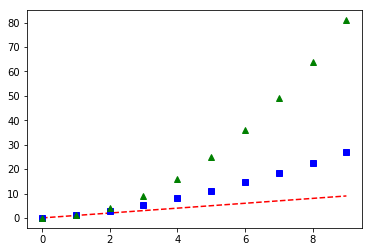

In [16]:
# red dashes, blue squares and green triangles
x = np.array(np.arange(10))
plt.plot(x, x, 'r--', x, x**1.5, 'bs', x, x**2, 'g^')
plt.show()

In [ ]:
https://matplotlib.org/users/pyplot_tutorial.html

In [ ]:
https://stackoverflow.com/questions/45862223/use-different-colors-in-scatterplot-for-iris-dataset

In [ ]:
https://gist.github.com/jobliz/2903500

In [ ]:
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html

In [ ]:
https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py

In [ ]:
https://matplotlib.org/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py

In [ ]:
# scatter histogram
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

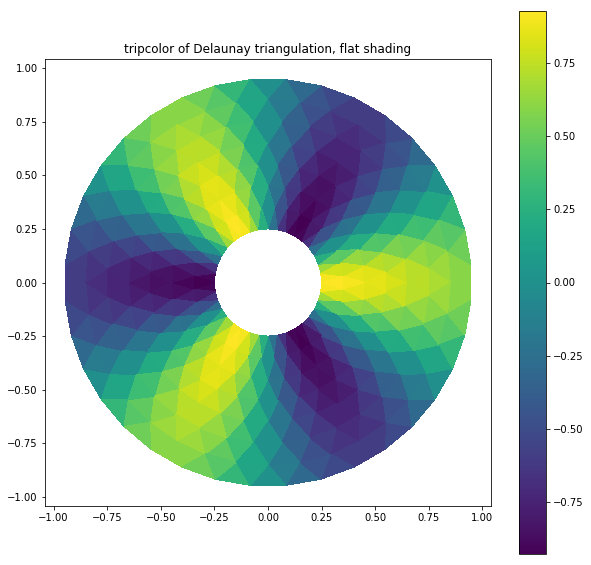

In [17]:
# matplotlib demo from https://matplotlib.org/gallery
import matplotlib.tri as tri
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles
x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()
triang = tri.Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1), y[triang.triangles].mean(axis=1)) < min_radius)
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.tripcolor(triang, z, shading='flat')
plt.colorbar()
plt.title('tripcolor of Delaunay triangulation, flat shading')
plt.show()

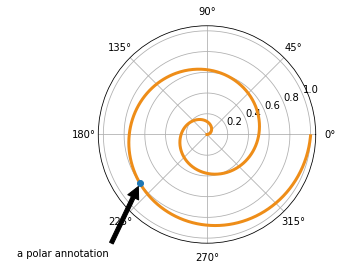

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

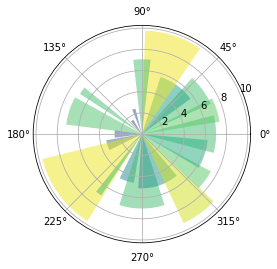

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

In [ ]:
# load dataset
iris = sns.load_dataset('iris')

In [ ]:
# sample
iris.sample(n = 10)

In [ ]:
# species
list(iris.species.unique())

In [ ]:
plt.scatter(x = iris.sepal_length, y = iris.sepal_width)

In [ ]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
#colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
l = [color[i] for i in iris.species]
plt.scatter(x=iris.sepal_length, y=iris.sepal_width, c=[colors[i] for i in iris.species], cmap='viridis')

In [ ]:
colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
plt.scatter(x=iris.loc[iris.species == 'setosa', 'sepal_length'], y=iris.loc[iris.species == 'setosa', 'sepal_width'])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
setosa = ax.scatter(iris.loc[iris.species == 'setosa', 'sepal_length'],
                    y=iris.loc[iris.species == 'setosa', 'sepal_width'],
                    s=50,
                    c='red')
versicolor = ax.scatter(iris.loc[iris.species == 'versicolor', 'sepal_length'],
                        y=iris.loc[iris.species == 'versicolor', 'sepal_width'],
                        s=50,
                        c='green')
virginica = ax.scatter(iris.loc[iris.species == 'virginica', 'sepal_length'],
                       y=iris.loc[iris.species == 'virginica', 'sepal_width'],
                       s=50,
                       c='blue')
ax.set_title('Sepal size from Iris dataset', fontsize=14)
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Seplal width (cm)')
ax.legend([setosa, versicolor, virginica], ["Iris Setosa", "Iris Versicolor", "Iris Virginica"], loc=2)

ax.grid(True, linestyle='-',color='0.75')

plt.show()

In [ ]:
iris.loc[iris.species == 'setosa', 'sepal_length']

In [ ]:
# plot sepal_length and sepal_width for all species
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="kde")

In [ ]:
#%matplotlib inline
x = np.array(range(-10, 11))
y = x ** 2

plt.scatter(x, y)

In [ ]:
x = np.array(range(-20, 21))

def graph(power):
    y = x**power
    return plt.scatter(x, y)

interact(graph, power = widgets.IntSlider(value=2, min=1, max=10, description='Power'))

In [ ]:
x = np.array(range(-10, 11))
y = x**8
plt.scatter(x, y)

In [ ]:
# select species
def my_plot(species):
    sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="kde");

interact(my_plot,
         species = widgets.RadioButtons(options=sorted(iris.species.unique()),
                                        value=sorted(iris.species.unique())[0],
                                        description='Species')
        )

In [ ]:
# select species
def my_plot(species):
    sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="kde");

interact(my_plot,
         species = widgets.ToggleButtons(options=sorted(iris.species.unique()),
                                        value=sorted(iris.species.unique())[0],
                                        description='Species',
                                        tooltips=[s.capitalize() for s in sorted(iris.species.unique())])
        )


In [ ]:
[s.capitalize() for s in sorted(iris.species.unique())]

In [ ]:
# seaborn jointplot
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="reg");

In [ ]:
# seaborn jointplot
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="hex");

In [ ]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="hex");

In [ ]:
# seaborn jointplot
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="hex");

In [ ]:
widgets.IntSlider(value=4, min=0, max=10, step=2, description='Demo')

In [ ]:
widgets.IntRangeSlider(value=[3, 7], min=0, max=10, step=1, description='Demo',)

In [ ]:
widgets.RadioButtons(options=['A', 'B', 'C'], value='B', description='Demo')

In [ ]:
widgets.Dropdown(options=[char for char in 'ABCDE'], value='B', description='Demo')

In [ ]:
widgets.Select(options=[char for char in 'ABCDE'],
               value='D',
               rows=3,
               description='Demo')

In [ ]:
widgets.ToggleButtons(options=['A', 'B', 'C'],
                      description='Demo',
                      value='B',
                      tooltips=['Omschrijving A', 'Omschrijving B', 'Omschrijving C']
)

In [ ]:
sns.regplot(x='sepal_length', y='sepal_width', data=iris)

In [ ]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", truncate=True, data=iris)

In [ ]:
def kwadraat(x):
    return x ** 2

interact(kwadraat, x = widgets.IntSlider())

In [ ]:
widgets.IntSlider(
    min = -5,
    max = 5,
    step =1,
    value = 0,
    description='IntSlider:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format='d'
)

In [ ]:
widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
 #    value='pineapple',
    description='Pizza topping:',
    disabled=False
)

[https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [ ]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

[https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html](https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html)

In [ ]:
# seaborn settings
sns.set(color_codes=True)

In [ ]:
# load dataset
iris = sns.load_dataset('iris')

In [ ]:
# info
iris.info()

In [ ]:
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="sepal_length", y="species",
            hue="species", palette=["m", "g"],
            data=iris)
sns.despine(offset=10, trim=True)

In [ ]:
sns.pairplot(iris,hue='species',palette="muted",size=5,vars=['sepal_width','sepal_length','petal_length','petal_width'],kind='scatter',markers=['o','x','+'])

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, hue="species",diag_kind="kde", palette="pastel")

In [ ]:
sns.pairplot(iris, diag_kind="kde", hue='species')

In [ ]:
sns.pairplot(iris, kind="reg", hue='species', diag_kind="kde")

In [ ]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="kde");